### AI Bootcamp - June 2024 Cohort - Analyzing and Predicting Flight Delays
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

In [35]:
# Do imports
import pandas as pd
import graphviz

In [36]:
# Remove the ! from the line below to install the graphviz package
!pip install graphviz

In [37]:
# Remove the ! from the line below to install the pydotplus package
!pip install pydotplus

In [38]:
# Create DataFrame
df = pd.read_csv('./data/Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [39]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [40]:
unique_airport_from = df['AirportFrom'].unique()
unique_airport_to = df['AirportTo'].unique()

unique_airport_codes = set(unique_airport_from).union(unique_airport_to)

airport_from_code_to_id = {code: i for i, code in enumerate(unique_airport_codes, 1)}

df['AirportFromId'] = df['AirportFrom'].map(airport_from_code_to_id)
df['AirportToId'] = df['AirportTo'].map(airport_from_code_to_id)

display(df.head(5))


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromId,AirportToId
0,1,CO,269,SFO,IAH,3,15,205,1,237,16
1,2,US,1558,PHX,CLT,3,15,222,1,79,46
2,3,AA,2400,LAX,DFW,3,20,165,1,262,282
3,4,AA,2466,SFO,DFW,3,20,195,1,237,282
4,5,AS,108,ANC,SEA,3,30,202,0,248,149


In [41]:
unique_airline = df['Airline'].unique()

airline_from_code_to_id = {code: i for i, code in enumerate(unique_airline, 1)}

df['AirlineId'] = df['Airline'].map(airline_from_code_to_id)

display(df.head(5))

#xs,y = to.train.xs,to.train.y
#valid_xs,valid_y = to.valid.xs,to.valid.y
#len(xs), len(valid_xs)

#X, y = df[['Week', 'Departure', 'Arrival', 'Airline', 'AirportFromId', 'AirportToId']], df['Delay']


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,AirportFromId,AirportToId,AirlineId
0,1,CO,269,SFO,IAH,3,15,205,1,237,16,1
1,2,US,1558,PHX,CLT,3,15,222,1,79,46,2
2,3,AA,2400,LAX,DFW,3,20,165,1,262,282,3
3,4,AA,2466,SFO,DFW,3,20,195,1,237,282,3
4,5,AS,108,ANC,SEA,3,30,202,0,248,149,4


In [42]:
#Use the train_test_split function to split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['AirlineId', 'Flight', 'AirportFromId', 'AirportToId', 'DayOfWeek']], df['Delay'], random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:

#Use DecisionTreeRegressor to train the model
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

dt_model = DecisionTreeClassifier(max_depth=5, random_state=1)
#rf_model = RandomForestClassifier(random_state=1)

dt_model.fit(X_train_scaled, y_train)
#rf_model.fit(X_train, y_train)

#Get predictions
dt_predictions = dt_model.predict(X_test_scaled)
#rf_predictions = rf_model.predict(X_test)

#Calculate the mean absolute error
#dt_mae = mean_absolute_error(y_test, dt_predictions)
#rf_mae = mean_absolute_error(y_test, rf_predictions)

#print("Decision Tree Mean Absolute Error: ", dt_mae)
#print("Random Forest Mean Absolute Error: ", rf_mae)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
print(f"Accuracy Score : {accuracy_score(y_test, dt_predictions)}")



Accuracy Score : 0.6296441867018673


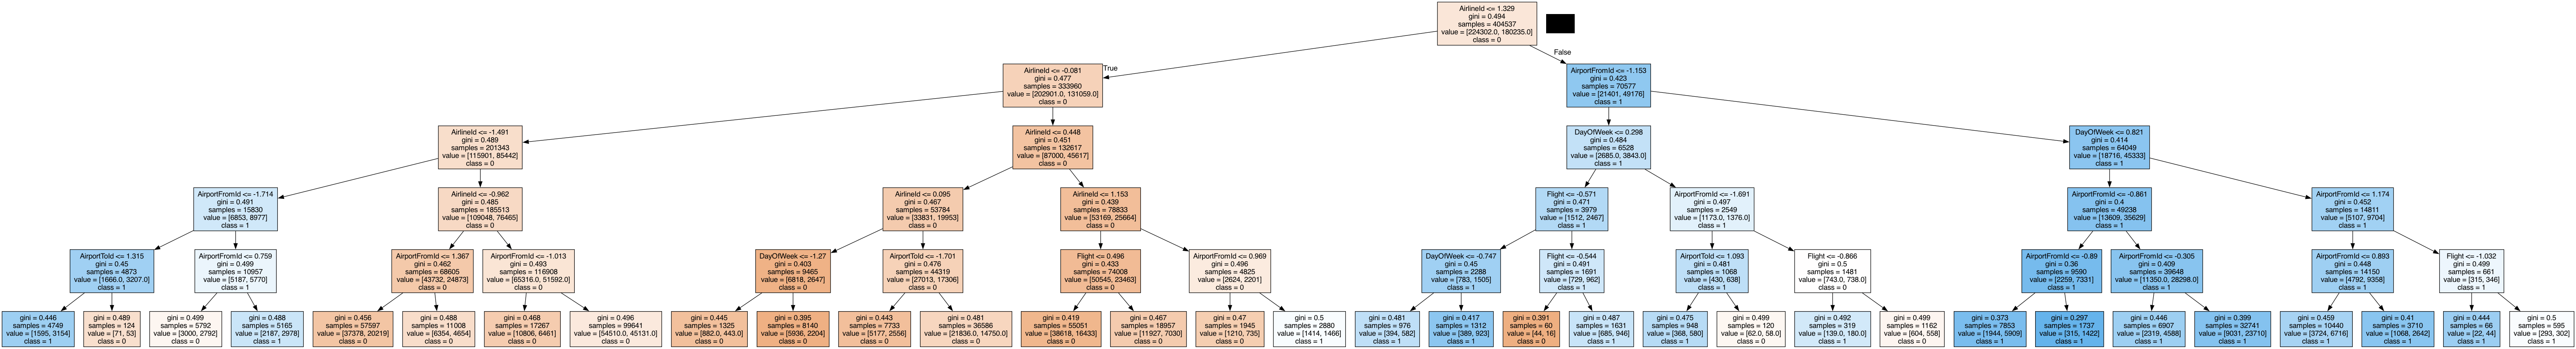

In [45]:
# Create DOT data
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X_train.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
graph.write_png("dt_model.png")
Image(graph.create_png())